In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os
from datetime import datetime
import random, itertools
import re,string,unicodedata
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import spacy
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\omogh\Desktop\DATA MINING 1 HWS 2021\DM Project\full_data_for_classification_with_aggregated_values.csv').drop(['Unnamed: 0','Var_tot_tot_indx',
                                                                                                    'binary_thunderstorm',
                                                                                                    'binary_severe_thunderstorm','Totals_idx_cat'],axis=1)

data.head()

,avg_tot_tot_indx,Var_perc_type,avg_perc_type,Var_surface_temperature,avg_surface_temperature,mean_Total_column_water_vapour,var_Total_column_water_vapour,mean_Total_column_water,var_Total_column_water,mean_U_component_stokes_drift,...,log_mean_two_m_dewpoint_temperature,log_var_two_m_dewpoint_temperature,log_mean_skin_temperature,log_var_skin_temperature,log_mean_surface_air_pressure,log_var_surface_air_pressure,log_var_hundred_metre_U_wind_component,log_var_neutral_wind_at_10_m_u_component,log_var_neutral_wind_at_10_m_v_component,log_m_medium_ccover
0,28.871947,5.874891,2.750027,0.025682,273.917257,7.599388,0.001272,7.747149,0.001285,-18431.447355,...,5.607103,0.026250,5.606527,1.175620,11.513592,9.460258,0.874559,-0.223159,-0.175535,-1.757664
1,30.291684,2.901000,4.625008,0.060179,274.445440,7.407456,0.013036,7.547069,0.015819,-18431.453998,...,5.605994,-0.688409,5.602733,1.905473,11.514630,9.730405,-0.918407,-2.261514,-0.568122,-2.563193
2,33.781080,0.041236,5.104156,0.053122,273.841263,7.454112,0.079448,7.574160,0.086356,-18431.427509,...,5.600426,-1.904541,5.599713,1.943483,11.515923,8.261645,0.594675,-1.854602,-2.851444,-2.552162
3,34.847245,0.000000,4.999985,0.285297,273.133409,7.050555,0.002004,7.166458,0.002047,-18431.410131,...,5.589787,0.443992,5.589041,2.085777,11.511937,9.750797,-1.240046,-2.757890,-1.673033,-1.221444
4,36.648213,1.083323,4.749989,2.132644,272.328182,6.910032,0.103630,7.090256,0.089188,-18431.427458,...,5.583844,0.678679,5.589835,2.351766,11.505662,11.694134,0.532543,-1.089470,-0.906940,-1.948422


In [3]:
print("Shape of df: ",data.shape)
print("Info of df: ",data.info())
print("Describe df: ",data.describe())

Shape of df:  (3653, 246)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Columns: 246 entries, avg_tot_tot_indx to log_m_medium_ccover
dtypes: float64(245), int64(1)
memory usage: 6.9 MB
Info of df:  None
Describe df:         avg_tot_tot_indx  Var_perc_type  avg_perc_type  \
count       3653.000000    3653.000000    3653.000000   
mean          41.249196       0.552435       0.668481   
std            7.386613       1.394284       0.923793   
min            1.199944       0.000000       0.000000   
25%           37.267272       0.009984       0.083337   
50%           42.395158       0.123275       0.437520   
75%           46.414512       0.201407       0.854206   
max           57.560371      10.280782       5.895834   

       Var_surface_temperature  avg_surface_temperature  \
count              3653.000000              3653.000000   
mean                  5.702399               284.510018   
std                   6.049846                 7.284917   
min 

In [4]:
data['target+1'].value_counts()

0    2164
1    1489
Name: target+1, dtype: int64

In [5]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [7]:
X=data.drop('target+1',axis=1)
y=data['target+1']
X


,avg_tot_tot_indx,Var_perc_type,avg_perc_type,Var_surface_temperature,avg_surface_temperature,mean_Total_column_water_vapour,var_Total_column_water_vapour,mean_Total_column_water,var_Total_column_water,mean_U_component_stokes_drift,...,log_mean_two_m_dewpoint_temperature,log_var_two_m_dewpoint_temperature,log_mean_skin_temperature,log_var_skin_temperature,log_mean_surface_air_pressure,log_var_surface_air_pressure,log_var_hundred_metre_U_wind_component,log_var_neutral_wind_at_10_m_u_component,log_var_neutral_wind_at_10_m_v_component,log_m_medium_ccover
0,28.871947,5.874891,2.750027,0.025682,273.917257,7.599388,0.001272,7.747149,0.001285,-18431.447355,...,5.607103,0.026250,5.606527,1.175620,11.513592,9.460258,0.874559,-0.223159,-0.175535,-1.757664
1,30.291684,2.901000,4.625008,0.060179,274.445440,7.407456,0.013036,7.547069,0.015819,-18431.453998,...,5.605994,-0.688409,5.602733,1.905473,11.514630,9.730405,-0.918407,-2.261514,-0.568122,-2.563193
2,33.781080,0.041236,5.104156,0.053122,273.841263,7.454112,0.079448,7.574160,0.086356,-18431.427509,...,5.600426,-1.904541,5.599713,1.943483,11.515923,8.261645,0.594675,-1.854602,-2.851444,-2.552162
3,34.847245,0.000000,4.999985,0.285297,273.133409,7.050555,0.002004,7.166458,0.002047,-18431.410131,...,5.589787,0.443992,5.589041,2.085777,11.511937,9.750797,-1.240046,-2.757890,-1.673033,-1.221444
4,36.648213,1.083323,4.749989,2.132644,272.328182,6.910032,0.103630,7.090256,0.089188,-18431.427458,...,5.583844,0.678679,5.589835,2.351766,11.505662,11.694134,0.532543,-1.089470,-0.906940,-1.948422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,38.744972,5.332907,2.270866,1.618656,274.416872,6.840186,0.401473,7.004086,0.460048,-18579.274977,...,5.606387,1.681825,5.617187,0.614694,11.489351,13.981747,0.373514,-0.530780,-1.655888,-0.629004
3649,51.397479,1.457857,1.229208,0.499817,277.138496,6.427623,0.001849,6.548050,0.001899,-18522.404389,...,5.620021,0.926618,5.619009,1.493076,11.472777,7.772494,1.859356,0.660643,0.049828,-0.568217
3650,54.711400,1.964794,1.437538,0.185528,276.227551,6.372121,0.024774,6.474477,0.028831,-18655.147617,...,5.614617,-1.591896,5.616252,0.616240,11.482497,12.870306,1.841936,1.136060,-0.540050,-0.736719
3651,53.840718,0.000000,1.000046,0.185841,276.639502,7.225365,0.020061,7.418203,0.024127,-18749.982794,...,5.615807,-1.585190,5.615075,1.318412,11.495818,11.396372,-0.435599,-0.600936,-2.694180,-1.199515


In [8]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [9]:
X_train.shape, X_test.shape

((2557, 245), (1096, 245))

In [10]:
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [87]:
X_train_new.shape, X_val.shape, y_train_new.shape

((1789, 245), (768, 245), (1789,))

In [14]:
from sklearn.preprocessing import StandardScaler
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train_new)
X_val = sc.transform(X_val)

In [15]:
from sklearn.ensemble import RandomForestClassifier
#training the model
rf=RandomForestClassifier()
#Fitting the model 
rf=rf.fit(X_train_new,y_train_new)
print(rf)

RandomForestClassifier()


In [16]:
#Predicting the model 
rf_predict=rf.predict(X_val)
print(rf_predict)

[0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 0 1 1 

In [17]:
rf_score=accuracy_score(y_val,rf_predict)
print("RandomForestClassifier_bow_score :",rf_score)
P, R, F1, _ = precision_recall_fscore_support(y_val, rf_predict, average='macro')
print('Precision: {}, Recall:{}, F1 Score: {}'.format(P, R, F1))

RandomForestClassifier_bow_score : 0.7552083333333334
Precision: 0.7532445086886843, Recall:0.7275268210050818, F1 Score: 0.7337562234925318


[[399  61]
 [127 181]]


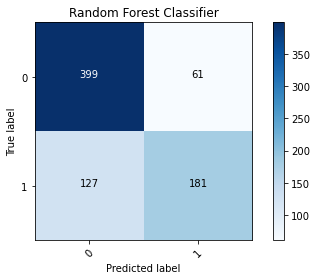

Random Forest with accuracy of 
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       460
           1       0.75      0.59      0.66       308

    accuracy                           0.76       768
   macro avg       0.75      0.73      0.73       768
weighted avg       0.75      0.76      0.75       768



In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_val, rf_predict)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_val, rf_predict)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='Random Forest Classifier')



print("Random Forest with accuracy of ".format(acc))
print(classification_report(y_val, rf_predict, target_names=['0','1']))

# Sampling Techniques using RandomUnderSampler, RandomOverSampler and SMOTE Over sampler

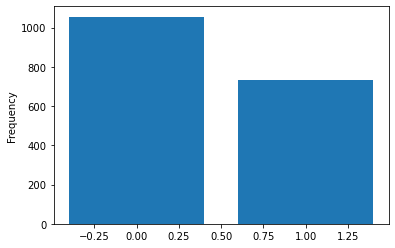

In [19]:
import matplotlib.pyplot as plt

class_dist = y_train_new.value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

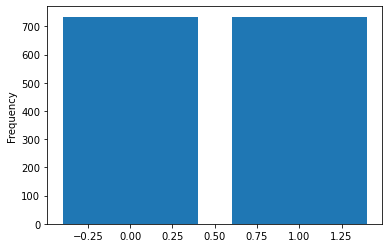

In [20]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler()
balanced_data, balanced_target = sampler.fit_resample(X_train_new, y_train_new)

class_dist = pd.Series(balanced_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

In [21]:
from imblearn.pipeline import Pipeline

sampler = RandomUnderSampler()

pipeline = Pipeline([ ('normalisation', sc), ('balancing', sampler), ('classification', rf) ])

accuracy_scr = cross_val_score(pipeline, X_train_new, y_train_new, cv=10, scoring='accuracy')

print("Average Accuracy = {}%".format(accuracy_scr.mean() * 100.0))

Average Accuracy = 72.94457347310275%


In [23]:
# # define pipeline  for undersampling
model = RandomForestClassifier()
steps = [('under', RandomUnderSampler()), ('model', model)]
pipeline_under = Pipeline(steps=steps)

rf_under_sampling = pipeline_under.fit(X_train_new, y_train_new)
print(rf_under_sampling)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', RandomForestClassifier())])


In [34]:
# ##Predicting the model for RandomUndersampling
rf_under_predict=pipeline_under.predict(X_val)
print(rf_under_predict)

[0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0
 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0
 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0
 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1
 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 1 0 1 0 0 0 0 1 1 

In [35]:
rf_under_score=accuracy_score(y_val,rf_under_predict)
print("rf_under_score :",rf_under_score)
P, R, F1, _ = precision_recall_fscore_support(y_val,rf_under_predict, average='macro')
print('P: {}, R:{}, F1: {}'.format(P, R, F1))

rf_under_score : 0.7369791666666666
P: 0.7284023668639054, R:0.7343026538678712, F1: 0.7301701047065781


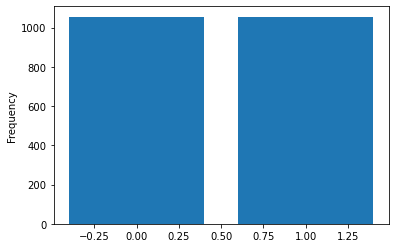

In [28]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
balanced_data, balanced_target = sampler.fit_resample(X_train_new, y_train_new)

class_dist = pd.Series(balanced_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

In [29]:

sampler = RandomOverSampler()

pipeline_1 = Pipeline([ ('normalisation', sc), ('balancing', sampler), ('classification', rf) ])

accuracy_scr = cross_val_score(pipeline_1, X_train_new, y_train_new, cv=10, scoring='accuracy')

print("Average Accuracy = {}%".format(accuracy_scr.mean() * 100.0))

Average Accuracy = 73.50197727700709%


In [45]:
# # define pipeline  for oversampling
model = RandomForestClassifier()
steps = [('over', RandomOverSampler()), ('model', model)]
pipeline_over = Pipeline(steps=steps)

rf_over_sampling = pipeline_over.fit(X_train_new, y_train_new)
print(rf_over_sampling)

Pipeline(steps=[('over', RandomOverSampler()),
                ('model', RandomForestClassifier())])


In [46]:
# ##Predicting the model for RandomUndersampling
rf_over_predict=pipeline_over.predict(X_val)
print(rf_over_predict)

[0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1
 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 0 1 1 

In [48]:
rf_over_score=accuracy_score(y_val,rf_over_predict)
print("rf_over_score :",rf_over_score)
P, R, F1, _ = precision_recall_fscore_support(y_val,rf_over_predict, average='macro')
print('P: {}, R:{}, F1: {}'.format(P, R, F1))

rf_over_score : 0.75
P: 0.7410512406401409, R:0.7317617165443253, F1: 0.735124842823783


[[379  81]
 [111 197]]


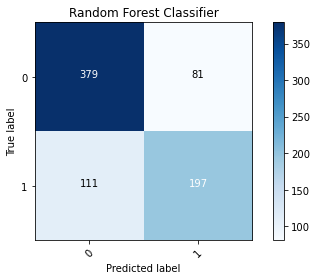

Random Forest Classifier with accuracy of 
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       460
           1       0.71      0.64      0.67       308

    accuracy                           0.75       768
   macro avg       0.74      0.73      0.74       768
weighted avg       0.75      0.75      0.75       768



In [49]:
# #compute the confusion matrix
cnf_matrix = confusion_matrix(y_val,rf_over_predict)
print(cnf_matrix)

# #compute accuracy score
acc = accuracy_score(y_val,rf_over_predict)

# #plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='Random Forest Classifier')



print("Random Forest Classifier with accuracy of ".format(acc))
print(classification_report(y_val,rf_over_predict, target_names=['0','1']))

In [41]:
# # define pipeline  for undersampling and smote
model = RandomForestClassifier()
steps = [('under', RandomUnderSampler()),('over', SMOTE()), ('model', model)]
pipeline_under_over = Pipeline(steps=steps)

rf_under_sampling_smote_over_sampling = pipeline_under_over.fit(X_train_new, y_train_new)
print(rf_under_sampling_smote_over_sampling)



Pipeline(steps=[('under', RandomUnderSampler()), ('over', SMOTE()),
                ('model', RandomForestClassifier())])


In [42]:
# ##Predicting the model for RandomUndersampling and SMOTE oversampling
rf_under_over_predict=pipeline_under_over.predict(X_val)
print(rf_under_over_predict)

[0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1
 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1
 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0
 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 0 0 1 1 

In [43]:
rf_under_over_score=accuracy_score(y_val,rf_under_over_predict)
print("rf_under_over_score :",rf_under_over_score)
P, R, F1, _ = precision_recall_fscore_support(y_val,rf_under_over_predict, average='macro')
print('P: {}, R:{}, F1: {}'.format(P, R, F1))

rf_under_over_score : 0.73828125
P: 0.7284702205243966, R:0.7321710897797855, F1: 0.7299365464250287


# Feature Selection Using SelectKbest

In [52]:
from sklearn.feature_selection import SelectKBest, f_classif
# feature selection using f_classif/ Select K best method

model = RandomForestClassifier()
steps_1 = [('over', RandomOverSampler()),  ('f_classif', SelectKBest(f_classif, k='all')), ('model', model)]
pipeline_1 = Pipeline(steps=steps_1)

In [53]:
rf_featur_selc_sampling_1 = pipeline_1.fit(X_train_new, y_train_new)
print(rf_featur_selc_sampling_1)

Pipeline(steps=[('over', RandomOverSampler()),
                ('f_classif', SelectKBest(k='all')),
                ('model', RandomForestClassifier())])


In [54]:
##Predicting the model  for SelectKbest and over sampling
rf_featur_selc_predict_1=pipeline_1.predict(X_val)
print(rf_featur_selc_predict_1)

[0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1
 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1
 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1
 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 1 0 0 0 0 1 1 

In [55]:
rf_featur_selc_score_1=accuracy_score(y_val,rf_featur_selc_predict_1)
print("rf_feature selection_score :",rf_featur_selc_score_1)
P, R, F1, _ = precision_recall_fscore_support(y_val,rf_featur_selc_predict_1, average='macro')
print('P: {}, R:{}, F1: {}'.format(P, R, F1))

rf_feature selection_score : 0.7604166666666666
P: 0.7533690316822848, R:0.7404573687182383, F1: 0.7447970469042339


[[387  73]
 [111 197]]


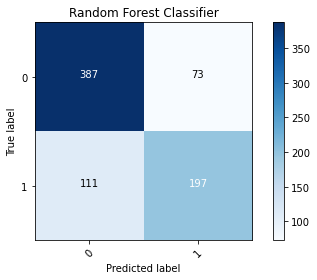

Random Forest Classifier with accuracy of 
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       460
           1       0.73      0.64      0.68       308

    accuracy                           0.76       768
   macro avg       0.75      0.74      0.74       768
weighted avg       0.76      0.76      0.76       768



In [58]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_val,rf_featur_selc_predict_1)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_val,rf_featur_selc_predict_1)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='Random Forest Classifier')



print("Random Forest Classifier with accuracy of ".format(acc))
print(classification_report(y_val,rf_featur_selc_predict_1, target_names=['0','1']))

# Hyperparameter Tuning

In [77]:
# define models and parameters for hyperparametrs
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

# define grid search

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto','sqrt'],
    'n_estimators': [100,1000],
     'criterion': ['gini','entropy'],
    'min_samples_split':[2,4]
}


# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = HalvingGridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
cv = StratifiedKFold(n_splits=10, shuffle = True, random_state=42)

In [78]:
# use randomoversampler 
steps_3 = [('over', RandomOverSampler()),  ('f_classif', SelectKBest(f_classif, k='all')), ('estimator', grid_search)]
pipeline_3 = Pipeline(steps=steps_3)
#fit the model
rf_hyperparameter = pipeline_3.fit(X_train_new, y_train_new)
print(rf_hyperparameter)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 234
max_resources_: 2110
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 16
n_resources: 234
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 1
n_candidates: 6
n_resources: 702
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 2
n_candidates: 2
n_resources: 2106
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Pipeline(steps=[('over', RandomOverSampler()),
                ('f_classif', SelectKBest(k='all')),
                ('estimator',
                 HalvingGridSearchCV(cv=3, estimator=RandomForestClassifier(),
                                     n_jobs=-1,
                                     param_grid={'bootstrap': [True],
                                                 'criterion': ['gini',
                                                               'entropy'],
                                          

In [79]:
# print('Best parameter set: %s' % grid_search.best_params_)
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))
best_parameters = grid_search.best_params_

Best Score:0.8094189145068841
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1000}


In [80]:
#Predicting the model for hyperparameters
rf_hyperparameter_predict = pipeline_3.predict(X_val)
print(rf_hyperparameter_predict)

[0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1
 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0
 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 0 1 1 

In [81]:
rf_final=accuracy_score(y_val,rf_hyperparameter_predict)
print("rf_hyperparameter_score :",rf_final)
P, R, F1, _ = precision_recall_fscore_support(y_val,rf_hyperparameter_predict, average='macro')
print('P: {}, R:{}, F1: {}'.format(P, R, F1))

rf_hyperparameter_score : 0.75
P: 0.7408665105386417, R:0.7322981366459628, F1: 0.735468871092741


In [89]:
# use randomoversampler on initial train test set
steps_4 = [('over', RandomOverSampler()),  ('f_classif', SelectKBest(f_classif, k='all')), ('estimator', grid_search)]
pipeline_4 = Pipeline(steps=steps_4)
#fit the model
rf_hyperparameter = pipeline_4.fit(X_train, y_train)
print(rf_hyperparameter)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 336
max_resources_: 3030
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 16
n_resources: 336
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 1
n_candidates: 6
n_resources: 1008
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 2
n_candidates: 2
n_resources: 3024
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Pipeline(steps=[('over', RandomOverSampler()),
                ('f_classif', SelectKBest(k='all')),
                ('estimator',
                 HalvingGridSearchCV(cv=3, estimator=RandomForestClassifier(),
                                     n_jobs=-1,
                                     param_grid={'bootstrap': [True],
                                                 'criterion': ['gini',
                                                               'entropy'],
                                         

In [90]:
# print('Best parameter set: %s' % grid_search.best_params_)
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))
best_parameters = grid_search.best_params_

Best Score:0.8125
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000}


In [91]:
#Predict the model using hyperparameter on held out test set
rf_hyperparameter_predict = pipeline_4.predict(X_test)
print(rf_hyperparameter_predict)


[0 0 0 ... 1 0 1]


In [92]:
rf_final_test=accuracy_score(y_test,rf_hyperparameter_predict)
print("rf_hyperparameter_score :",rf_final_test)
P, R, F1, _ = precision_recall_fscore_support(y_test,rf_hyperparameter_predict, average='macro')
print('P: {}, R:{}, F1: {}'.format(P, R, F1))

rf_hyperparameter_score : 0.7536496350364964
P: 0.7451494164645953, R:0.7422019075983357, F1: 0.7435017318313727


[[522 127]
 [143 304]]


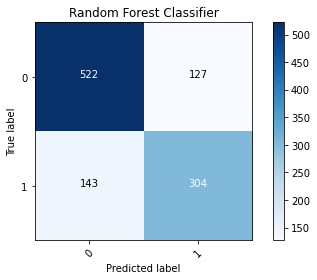

Random Forest Classifier with accuracy of 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       649
           1       0.71      0.68      0.69       447

    accuracy                           0.75      1096
   macro avg       0.75      0.74      0.74      1096
weighted avg       0.75      0.75      0.75      1096



In [95]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_test,rf_hyperparameter_predict)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_test,rf_hyperparameter_predict)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='Random Forest Classifier')




print("Random Forest Classifier with accuracy of ".format(acc))
print(classification_report(y_test,rf_hyperparameter_predict, target_names=['0','1']))

# Feature Importance Random Forest

In [104]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier()

In [114]:
rf.feature_importances_


array([0.03860581, 0.0026553 , 0.00232671, 0.00411239, 0.00279452,
       0.00249266, 0.0033505 , 0.0030595 , 0.00380217, 0.00342495,
       0.00308711, 0.00334775, 0.00244217, 0.00317599, 0.00402173,
       0.00230596, 0.00229478, 0.00241216, 0.00315544, 0.00353232,
       0.00397716, 0.        , 0.        , 0.00237505, 0.00303426,
       0.        , 0.        , 0.00375135, 0.00391462, 0.00456294,
       0.        , 0.00305376, 0.        , 0.00305605, 0.00274546,
       0.00332745, 0.        , 0.00334355, 0.        , 0.00267139,
       0.00359118, 0.00386195, 0.00579969, 0.00284653, 0.00323746,
       0.00469611, 0.00409994, 0.00346984, 0.00310922, 0.00327951,
       0.00341018, 0.00471365, 0.0034931 , 0.00777841, 0.00373053,
       0.00359072, 0.00419499, 0.01688834, 0.00567749, 0.00598349,
       0.00320559, 0.00793757, 0.00376268, 0.01117731, 0.00650037,
       0.00367108, 0.00762394, 0.00486194, 0.00683304, 0.03651136,
       0.00236933, 0.00214622, 0.00584083, 0.00359207, 0.00267

Text(0.5, 0, 'Random Forest Feature Importance')

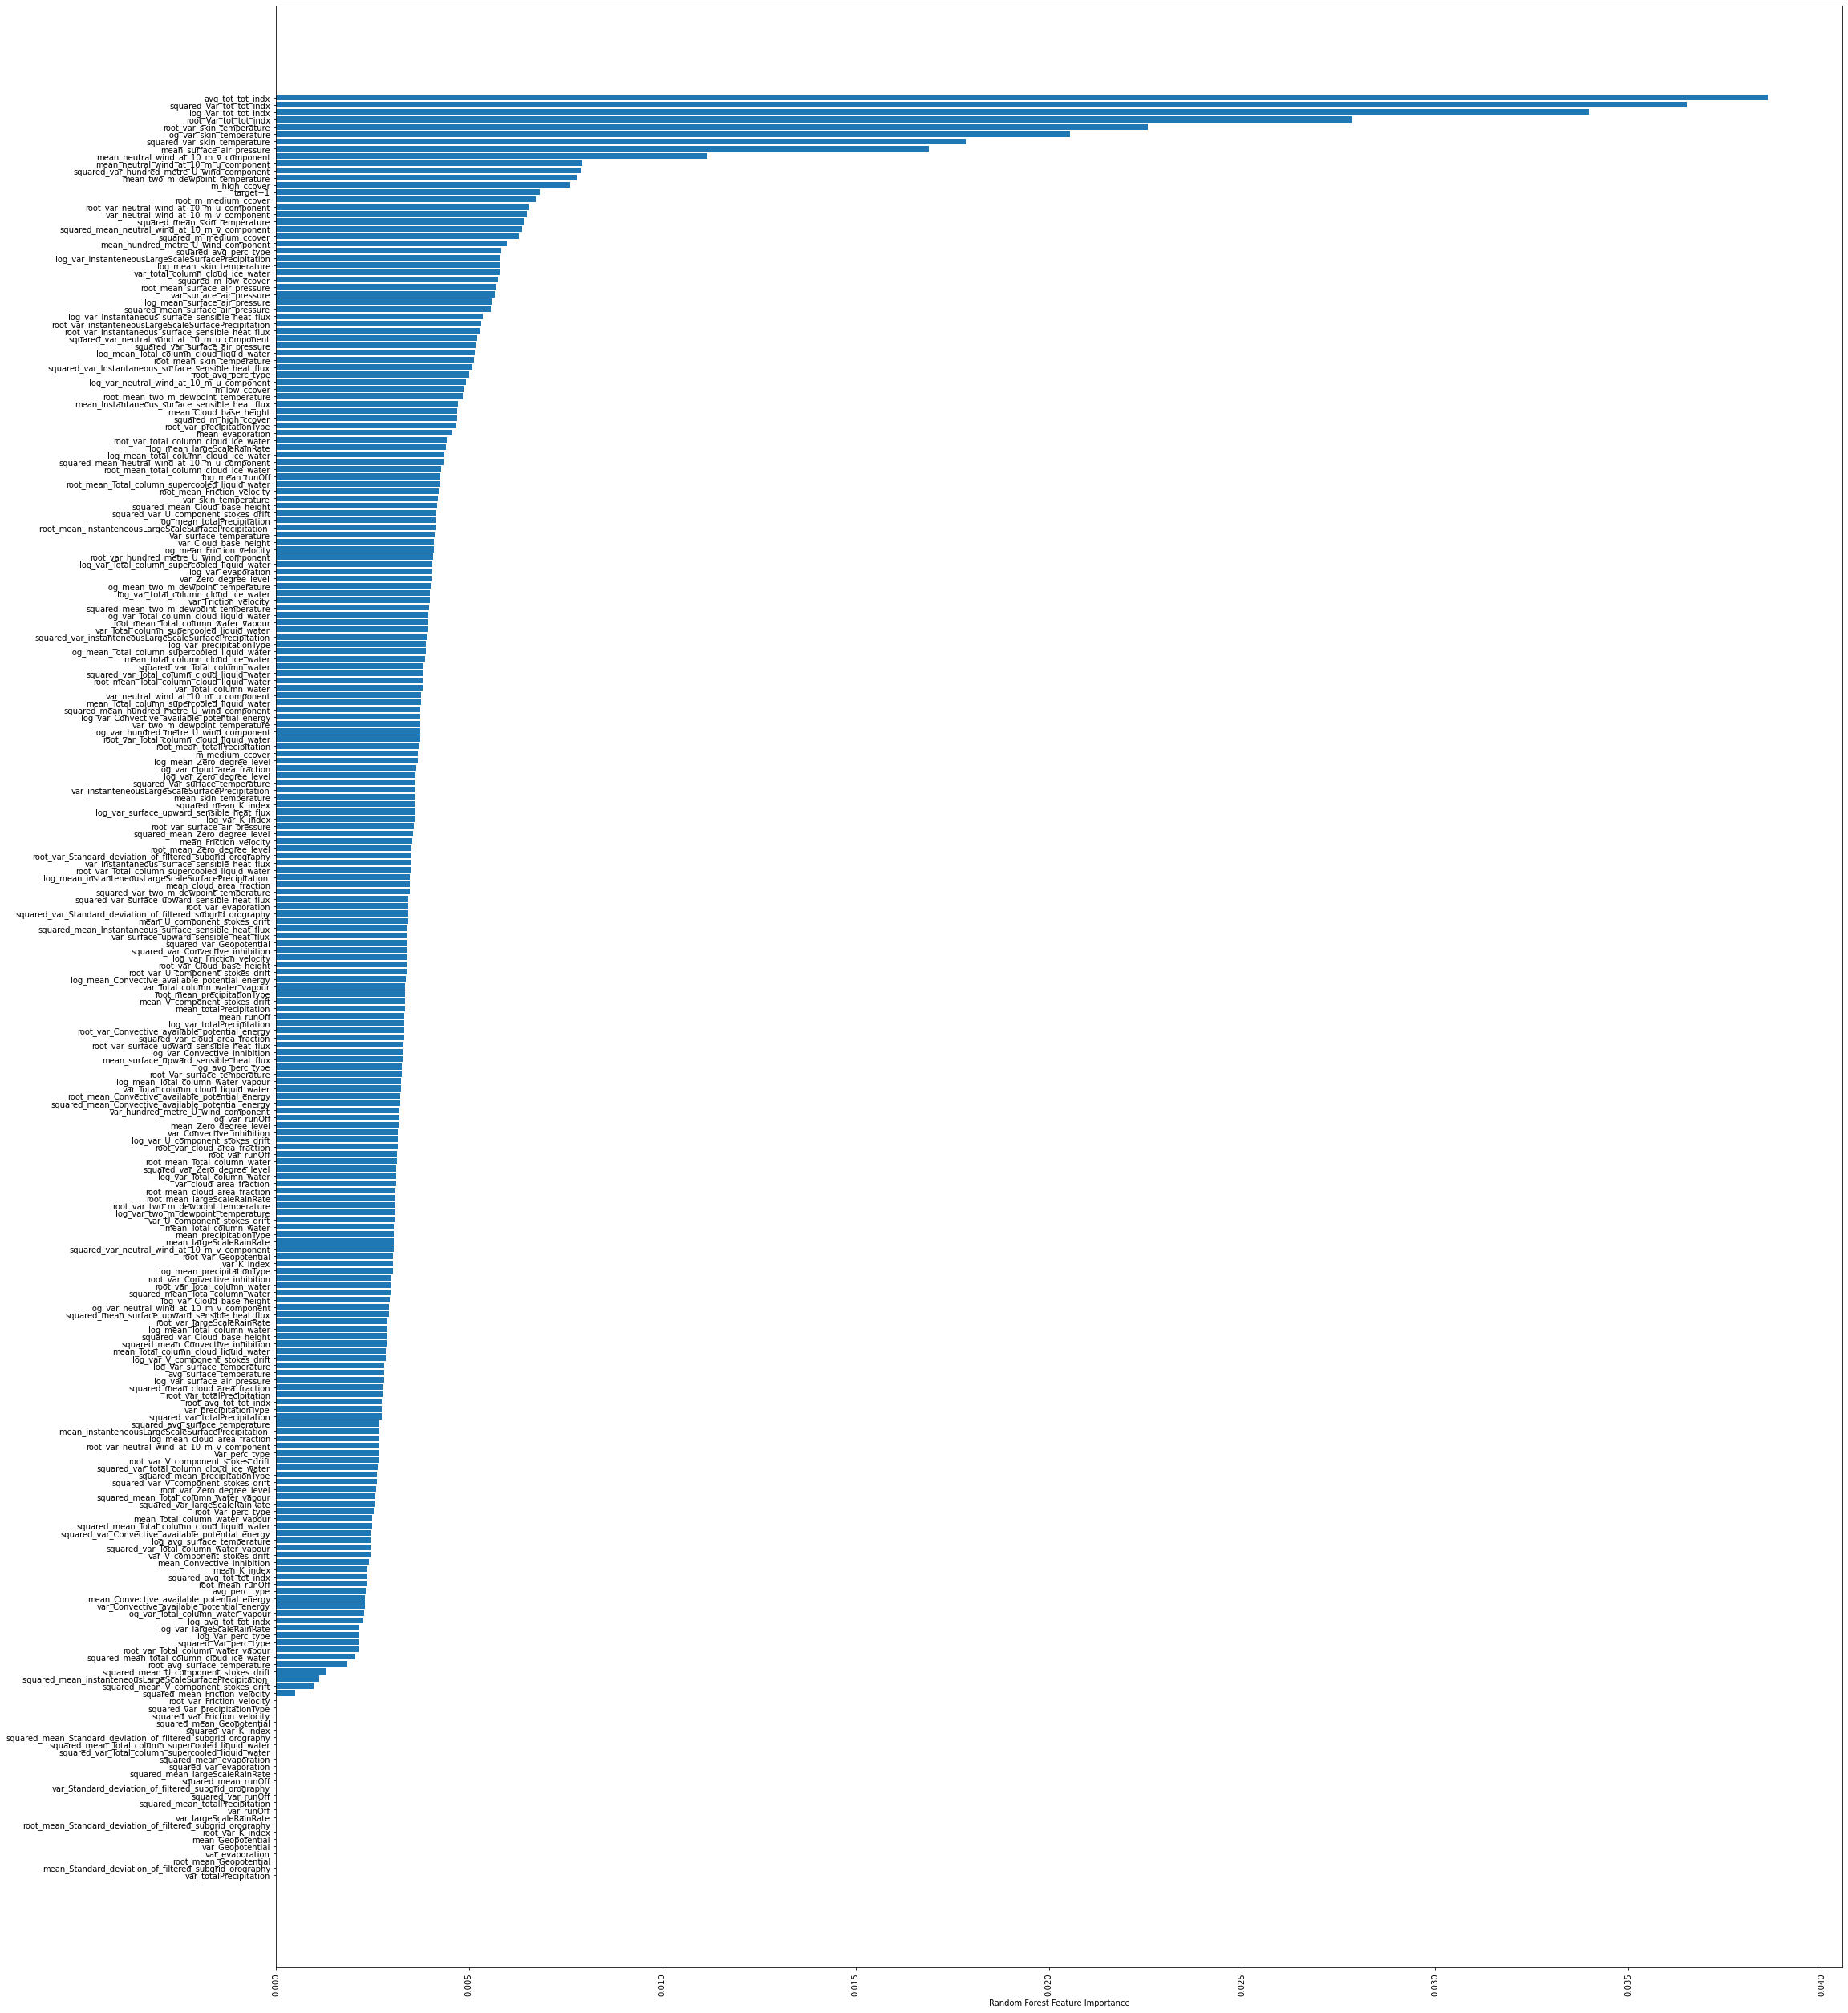

In [120]:
#plot graph of feature importances

sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(35,45))
plt.barh(data.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xticks(rotation=90)
plt.xlabel("Random Forest Feature Importance")


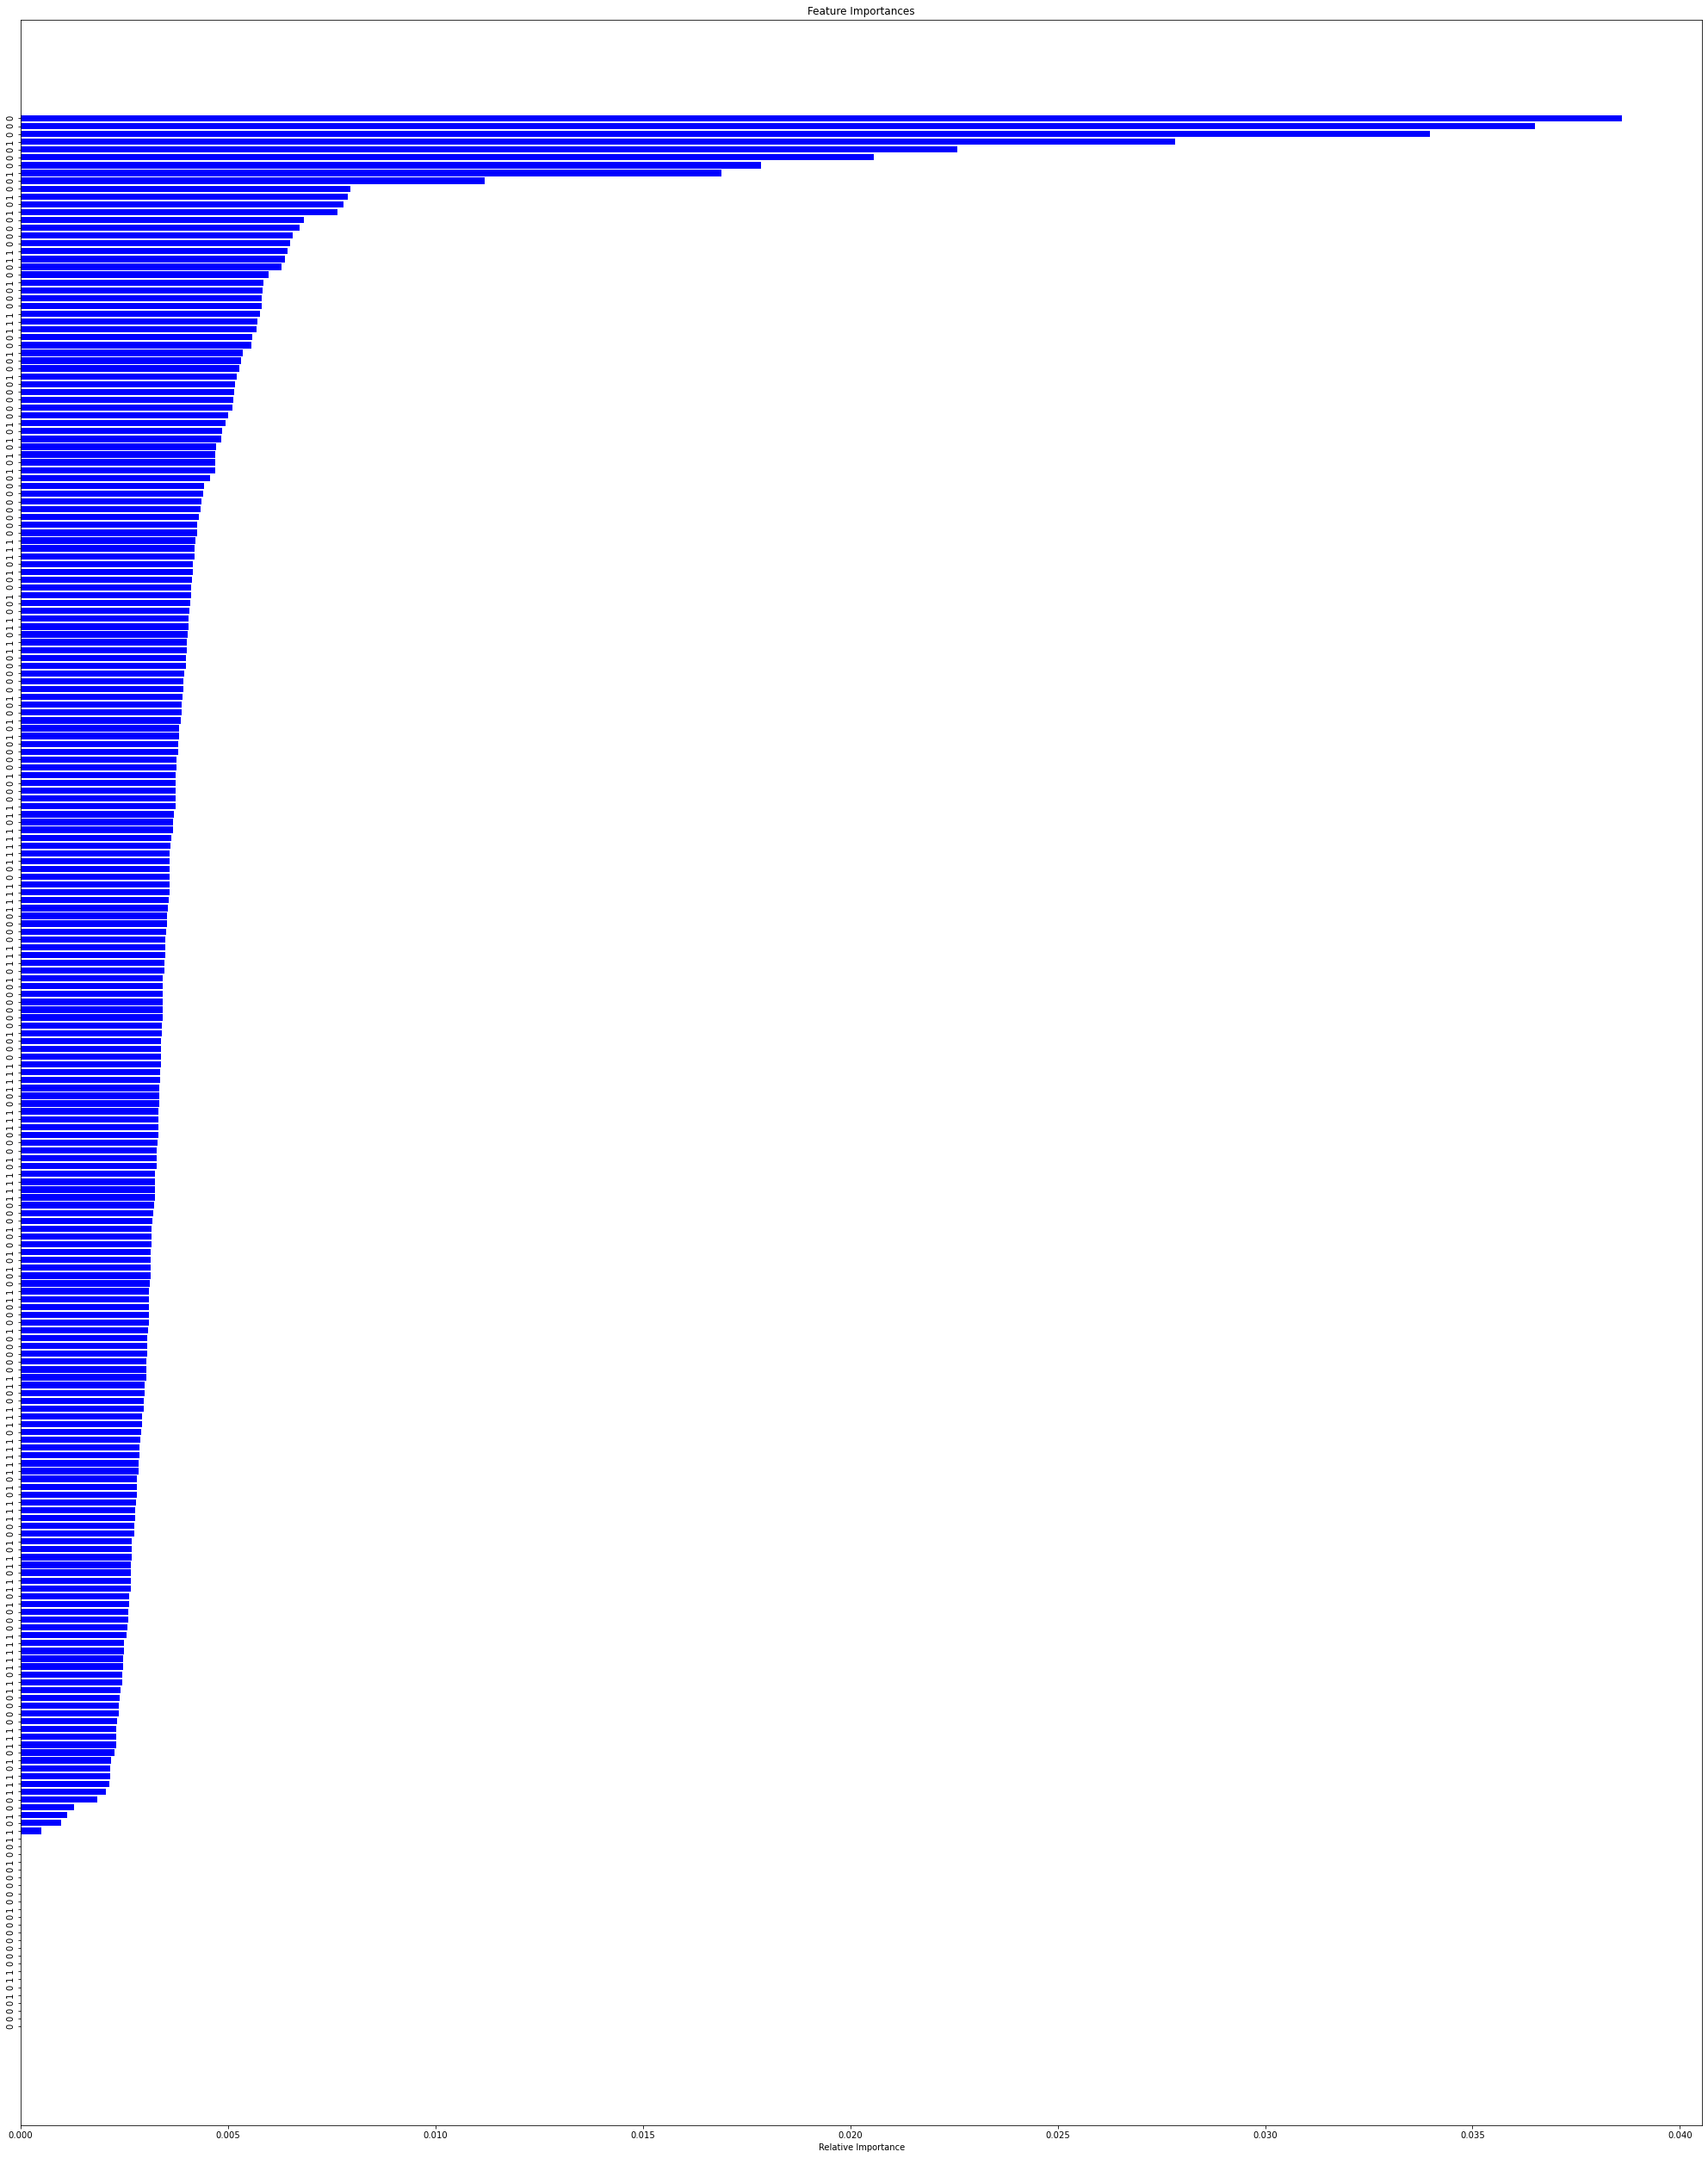

In [122]:
features = data['target+1']
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(35,45))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.yticks(rotation=90)
plt.xlabel('Relative Importance')
plt.show()



